In [2]:
# Step 1: Preperation
# Import beberapa library yang dibutuhkan
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Step 2: Data Gathering
# Load dataset happydata.csv
dataset = pd.read_csv('happydata.csv')
dataset.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [6]:
# Step 3: Data Assesing
# Cek informasi dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [8]:
# Cek nilai statistik dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
infoavail,143.0,4.314685,0.799820,1.0,4.0,5.0,5.0,5.0
housecost,143.0,2.538462,1.118155,1.0,2.0,3.0,3.0,5.0
schoolquality,143.0,3.265734,0.992586,1.0,3.0,3.0,4.0,5.0
policetrust,143.0,3.699301,0.888383,1.0,3.0,4.0,4.0,5.0
streetquality,143.0,3.615385,1.131639,1.0,3.0,4.0,4.0,5.0
ëvents,143.0,4.216783,0.848693,1.0,4.0,4.0,5.0,5.0
happy,143.0,0.538462,0.500271,0.0,0.0,1.0,1.0,1.0


In [10]:
# Step 4: Data Cleaning
# Cek nilai Null
dataset.isna().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

In [12]:
# Cek duplikasi data
duplicated = dataset.duplicated()
print('Jumlah duplikasi:', duplicated.sum(), '\n')
print(dataset[duplicated])

Jumlah duplikasi: 18 

     infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
4            5          4              3            3              3       5   
21           4          2              3            3              4       4   
23           4          3              5            5              5       4   
29           3          3              1            3              3       4   
35           3          2              4            4              4       5   
39           5          3              4            3              4       5   
53           5          1              3            3              4       4   
54           5          1              3            3              4       4   
56           5          2              4            3              4       5   
58           4          3              2            4              3       4   
66           5          2              4            4              5       5   
69           4   

happy
0    66
1    77
dtype: int64


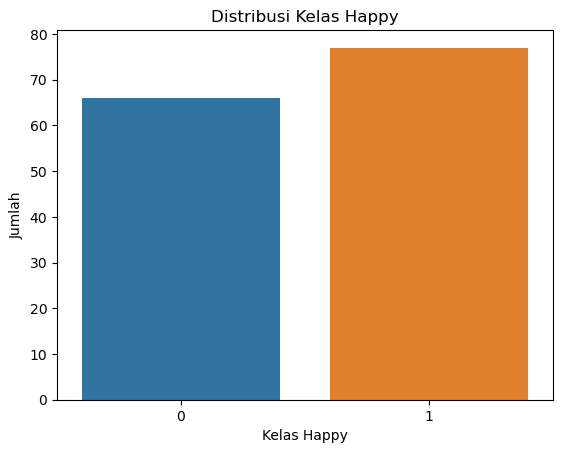

In [16]:
# Step 5: Exploratory Data Analysis (EDA)
# Distribusi kolom target atau class
print(dataset.groupby('happy').size())

# Jika menggunakan seaborn
sns.countplot(x='happy', data=dataset, hue='happy')
plt.title('Distribusi Kelas Happy')
plt.xlabel('Kelas Happy')
plt.ylabel('Jumlah')
plt.legend().remove()
plt.show()

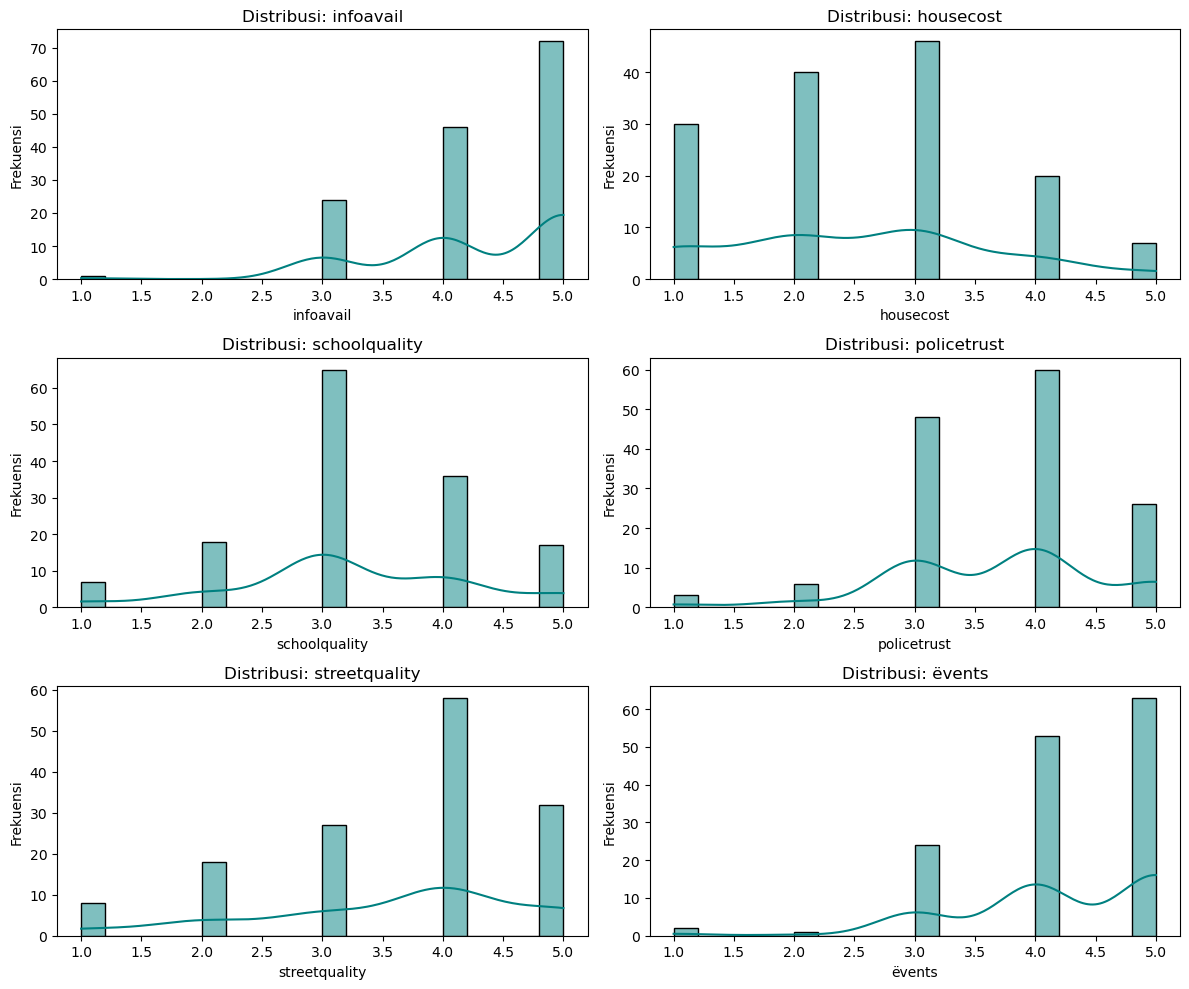

In [18]:
# Distribusi kolom numerik

# Ambil semua kolom numerik kecuali 'happy'
kolom = dataset.drop(columns='happy').columns.tolist()

# Atur jumlah subplot (contoh: 3 baris x 2 kolom = 6 plot)
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Loop setiap kolom dan subplot
for i, ax in enumerate(axes.flatten()):
    if i < len(kolom):  # Pastikan tidak kelebihan index
        sns.histplot(data=dataset, x=kolom[i], bins=20, kde=True, color='teal', ax=ax)
        ax.set_title(f'Distribusi: {kolom[i]}')
        ax.set_xlabel(kolom[i])
        ax.set_ylabel('Frekuensi')
    else:
        ax.axis('off')  # Kosongkan subplot jika tidak ada kolom lagi

plt.tight_layout()
plt.show()

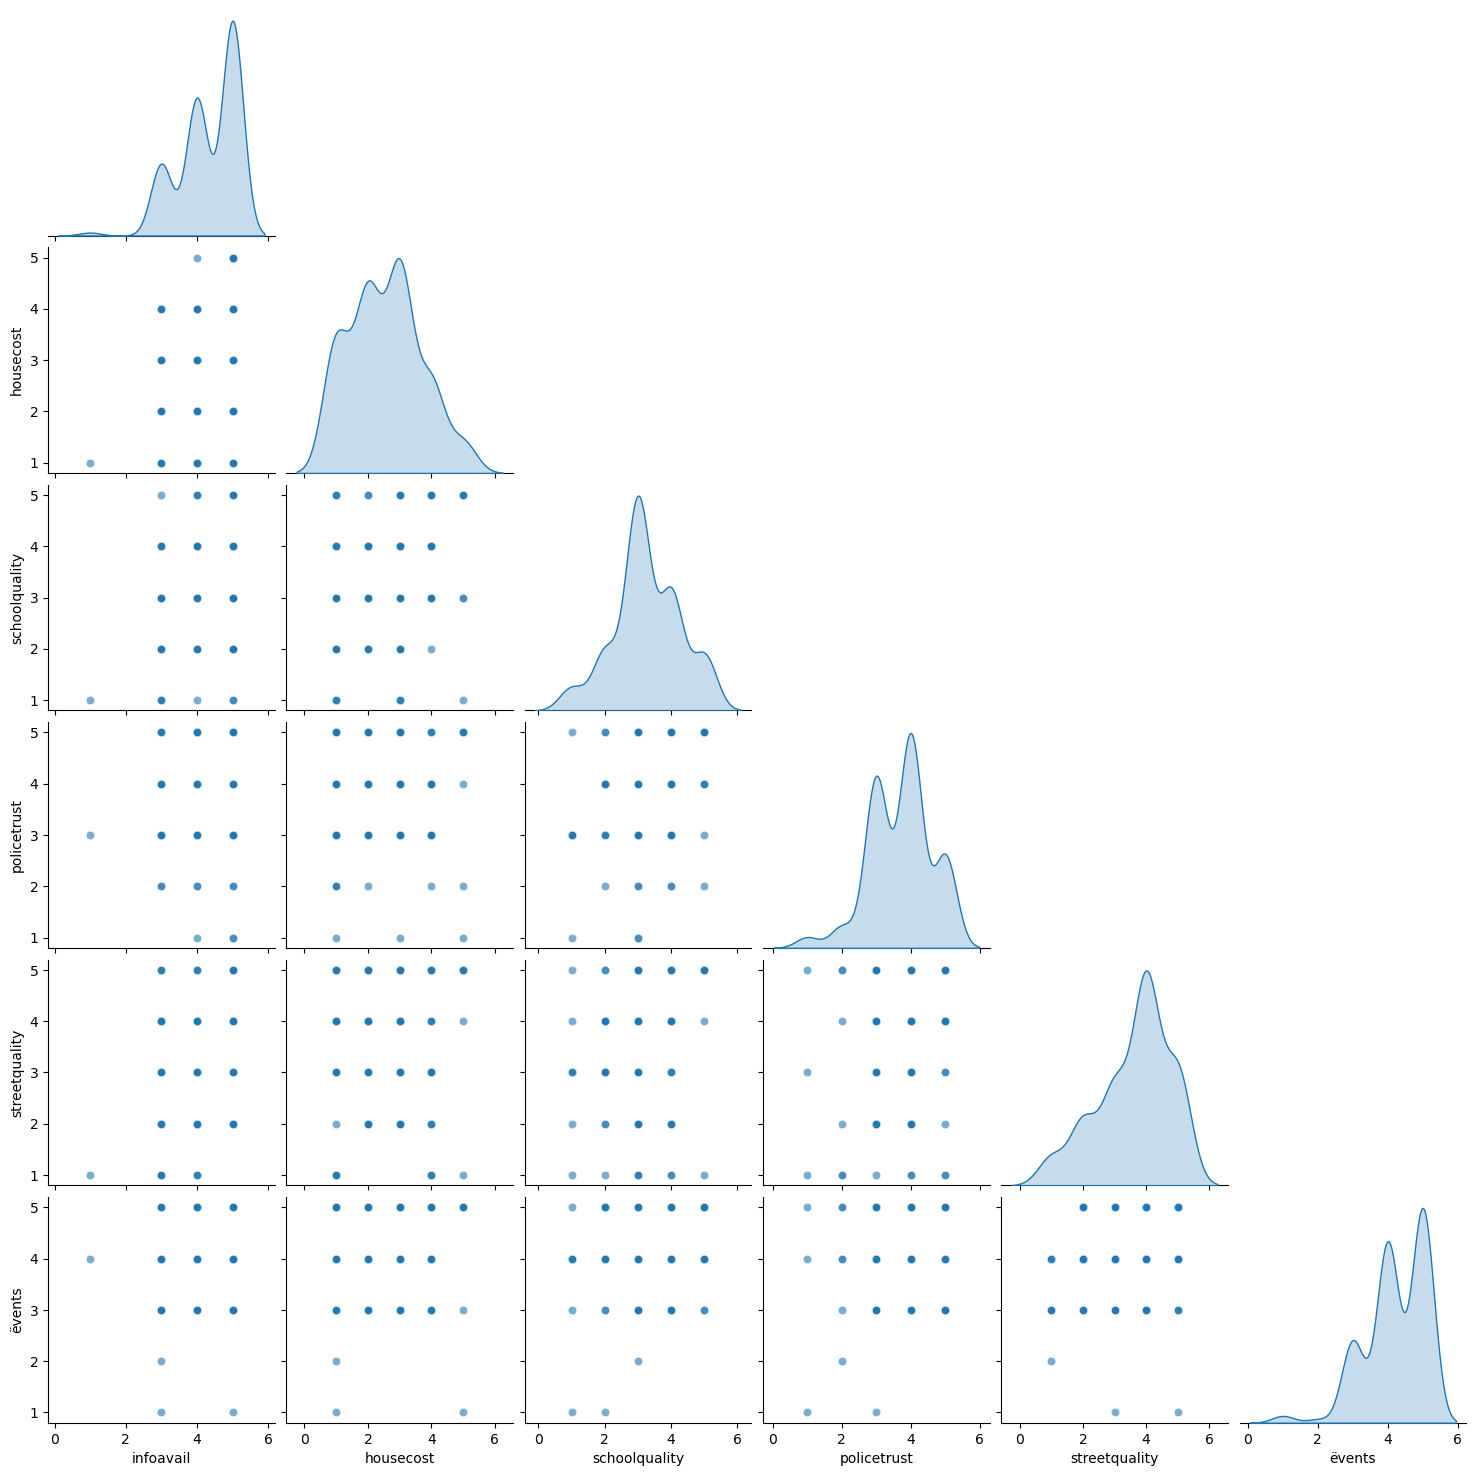

In [22]:
# Korelasi fitur

# Ambil semua kolom numerik kecuali 'happy'
kolom = dataset.drop(columns='happy').columns.tolist()

# Buat pairplot
sns.pairplot(dataset[kolom], corner=True, diag_kind='kde', plot_kws={'alpha': 0.6})

In [24]:
# Step 5: Model Training
# Split dataset menjadi data latih dan uji
X = dataset.drop(columns='happy')
y = dataset['happy']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=64)

In [26]:
# Bangun model klasifikasi yang telah ditentukan
models = [] # List kosong untuk menyimpan model

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [28]:
# Step 6: Model Evaluation
# Evaluasi model berdasarkan masing-masing algoritma model nya
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' w

LR: 0.500000 (0.109545)
LDA: 0.510000 (0.175784)
KNN: 0.450000 (0.136015)
DT: 0.590000 (0.181384)
NB: 0.520000 (0.198997)
SVM: 0.470000 (0.223830)


In [30]:
# Buat prediksi dari data uji
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
# Evaluasi hasil prediksi dengan Confusion Matrix
print(accuracy_score(y_test, y_pred), '\n')
print(confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

0.5813953488372093 

[[10  6]
 [12 15]] 

              precision    recall  f1-score   support

           0       0.45      0.62      0.53        16
           1       0.71      0.56      0.62        27

    accuracy                           0.58        43
   macro avg       0.58      0.59      0.58        43
weighted avg       0.62      0.58      0.59        43

